In [166]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.cluster import KMeans
k = 5
dataset= pd.read_csv(r"./dataset/Mall_Customers.csv") # 고객 데이터셋 불러오기
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [167]:
data = dataset.iloc[:, [3, 4]].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [215]:
centroids_x = np.random.uniform(dataset['Annual Income (k$)'].min(), dataset['Annual Income (k$)'].max(), k)
centroids_y = np.random.uniform(dataset['Spending Score (1-100)'].min(), dataset['Spending Score (1-100)'].max(), k)
centroids = list(zip(centroids_x, centroids_y))

In [216]:
centroids

[(81.4636453736265, 67.03800079853559),
 (130.5203887569824, 17.51588188944324),
 (123.93389819245066, 62.086400410619326),
 (104.30794981818818, 57.86867137975733),
 (119.92019922824915, 1.552103564336179)]

In [217]:
x = data[:,0]
y = data[:,1]

In [218]:
def euclidean_distance(pt1, pt2):
    distance = 0
    for i in range(len(pt1)):
        distance += (pt1[i] - pt2[i]) ** 2
    return distance ** 0.5

In [219]:
centroids = np.array(centroids)

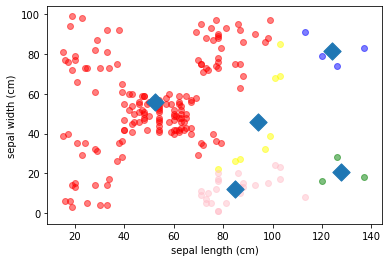

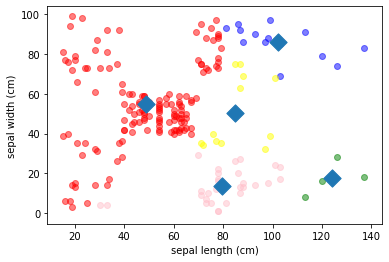

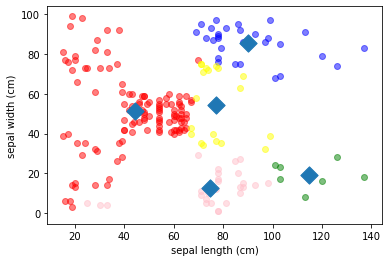

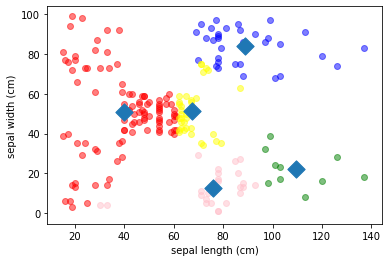

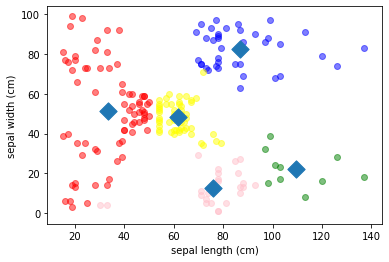

In [220]:
centroids_old = np.zeros(centroids.shape) 
labels = np.zeros(len(x))
error = np.zeros(k)

for i in range(k):
    error[i] = euclidean_distance(centroids_old[i], centroids[i])

while(error.all() != 0):
    for i in range(len(x)):
        distances = np.zeros(k)
        for j in range(k):
            distances[j] = euclidean_distance(data[i], centroids[j])
        cluster = np.argmin(distances)  # np.argmin은 가장 작은 값의 index 반환
        labels[i] = cluster
    centroids_old = deepcopy(centroids) # 전 중심점 저장
    for i in range(k):
        # 클러스터 점 저장
        points = [ data[j] for j in range(len(data)) if labels[j] == i ]
        centroids[i] = np.mean(points, axis=0) # 클러스터 중심점 
    for i in range(k):
        error[i] = euclidean_distance(centroids_old[i], centroids[i])
        colors = ['red', 'green', 'blue' ,'yellow','pink']
        points = np.array([data[j] for j in range(len(data)) if labels[j] == i])
        plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.show()

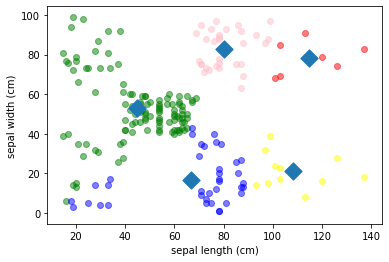

In [212]:
colors = ['red', 'green', 'blue' ,'yellow','pink']
for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()